# Etude des ventes de cette année de l'entreprise

Dans ce document nous allons etudier les ventes de l'années de l'entreprise en essayant de detaillers un maximum nos demarche et en les rendant le plus simple a comprendre possible, afin de delivrer des informations claire et utile.

### Sommaire

###### Perte de CA durant l'année
Avant de commencer notre etude en details apres un survole des données nous nous somme retrouver a un probleme sur le CA que nous allons detailler dans cette partie

   - [Perte de CA, Detection et Actions](#Perte-de-CA)
   

##### Dans un premiers temps nous nous pencherons sur l'etude des clients

   - [Etude du portefeuille client](#Le-portefeuille-client)
   - [Etude des acheteurs](#Les-acheteurs)
   - [Etude des depense des clients](#Etude-des-depenses-des-clients)

##### Ensuite nous observerons les produits 
    
   - [Etude du catalogue de produits](#Le-catalogue)
   - [Etude des ventes de l'année](#Etude-des-produits-acheter)
        

###### Nous nous interesserons a l'etude des paniers

   - [Etude des paniers](#Etude-des-paniers)


###### Finalement nous etudirons de possible corrélation entre les differentes données

   - [Sex et categorie](#Correlation:-Sexes-Catégories)
   - [Ages et montant total d'achat](#Correlation:-Ages-et-montant-total-d'achat)
   - [Age et fréquence d'achat](#Correlation:-Age-et-fréquence-d'achat)
   - [Age et nombre de produits moyen acheté](#Correlation:-Age-et-nombre-de-produits-moyen-acheté)
   - [Age et categories acheté](#Correlation:-Age-et-categories-acheté)





Import des differentes Librairie


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as st
import numpy as np
import re
plt.style.use('seaborn-deep')

%matplotlib inline


Import des données

In [2]:

cus = pd.read_csv("data/customer_formate.csv")
pro = pd.read_csv("data/product_formate.csv")
tra = pd.read_csv("data/transaction_formate.csv",parse_dates=[1])


### Presentation des données

In [3]:
cus.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
pro.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
tra.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


Voici a quoi ressemble nos données


Pour plus de simpliciter nous allons ajouter une colonne avec l'age de chaque personne en plus de leur date de naissance. Le tout sera plus lisible par la suite

In [6]:
date = dt.datetime.now()

cus['age'] = date.year - cus['birth']+2

cus.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


### Creation d'un DataFrame pour l'etude des transactions


Pour l'etude des depense et des transaction des clients, nous avons crée un nouveau dataframe qui contient les informations des clients et des produits ainsi que les transactions qui leur sont lier.

In [7]:
data = pd.DataFrame(tra)
data = pd.merge(data, pro, left_on='id_prod', right_on='id_prod', left_index=True, right_index=False, how='left')
data = pd.merge(data, cus, left_on='client_id', right_on='client_id', left_index=False, right_index=False, how='left')
data.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,42


# Perte de CA

Avec la creation de notre nouveau dataframe nous avons put avoir une vision globale des depenses, et nous avons trouver un petit probleme.

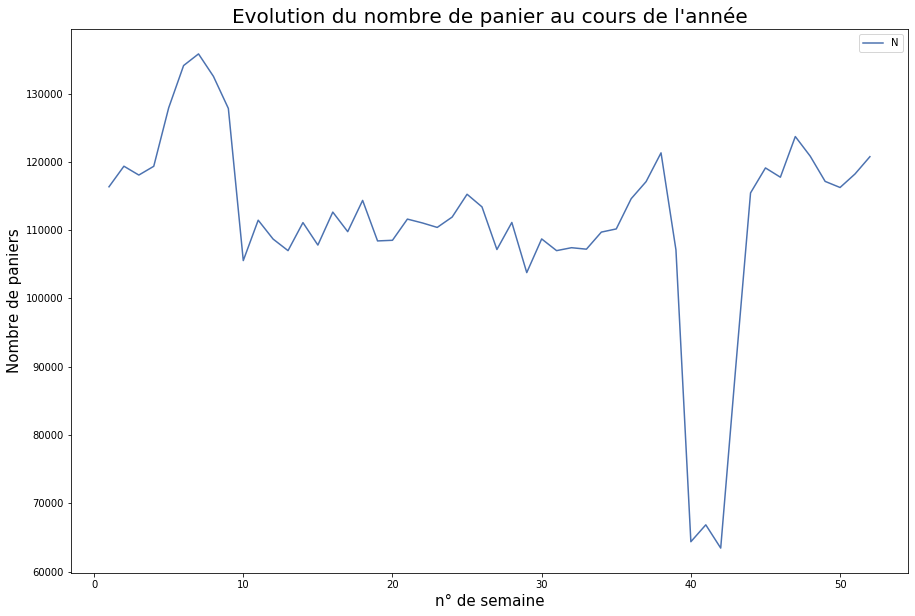

In [8]:
#Etude du nombre de paniers au cours du temp(semaine)

panier_parSemaine = pd.pivot_table(data,values='price', index=data.date.dt.week, aggfunc='sum')
panier_parSemaine.plot(figsize=(15,10))
plt.title("Evolution du nombre de panier au cours de l'année",fontsize=20)
plt.ylabel("Nombre de paniers",fontsize=15)
plt.xlabel("n° de semaine",fontsize=15)
plt.legend("Nombre de panier")
plt.show()


Comme nous pouvons le remarquer le Chiffre d'affaire subis un fort recule au allentours d'octobre.


### Etude plus approfondi 

Nous allons dans cette partie etudier cette perte de CA pour en trouver la cause.

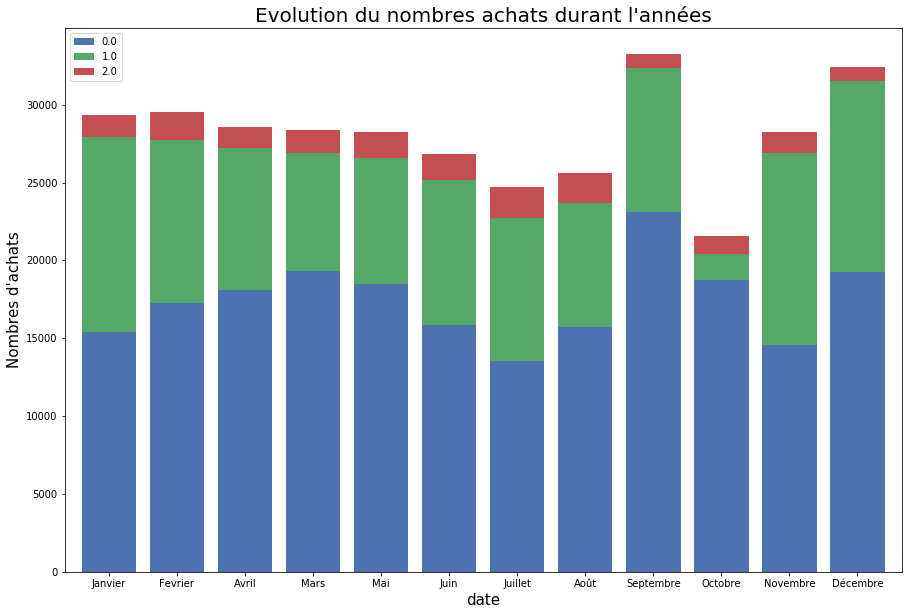

In [9]:
t = pd.pivot_table(data, values='id_prod', index= [data.date.dt.month], columns='categ', aggfunc='count')
t = t.reset_index()

t[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('date',fontsize=15)
plt.ylabel("Nombres d'achats",fontsize=15)
plt.title("Evolution du nombres achats durant l'années",fontsize=20)
plt.grid(False)
plt.legend()

plt.show()

In [10]:
t[t['date'] == 1]


categ,date,0.0,1.0,2.0
0,1,15381,12560,1370


_Nombres d'achat par categories durant janvier_

In [11]:
t[t['date'] == 10]

categ,date,0.0,1.0,2.0
9,10,18751,1666,1160


_Nombres d'achat par categories durant Octobre_

In [12]:
t[1].mean()

9144.583333333334

_Nombres d'achat moyen pour la categorie 1 durant l'année_

Ce graph nous montre clairement un changement soudain dans la tendance des achats de nos clients. On peut voire une casi disparition des achats de categorie 1 alors qu'il y a une tres fortes augmentations des achats de la categorie 0.

Cette forte baisse des achats de categorie 1 peuvent expliquer la baisse de CA, le prix moyen de categorie 0 est d'environs 10€ tandis que celui de categorie 1 est de 20€ (details plus bas). Le gain d'achat de la categorie 0 ne compense donc pas la perte de la categorie 1

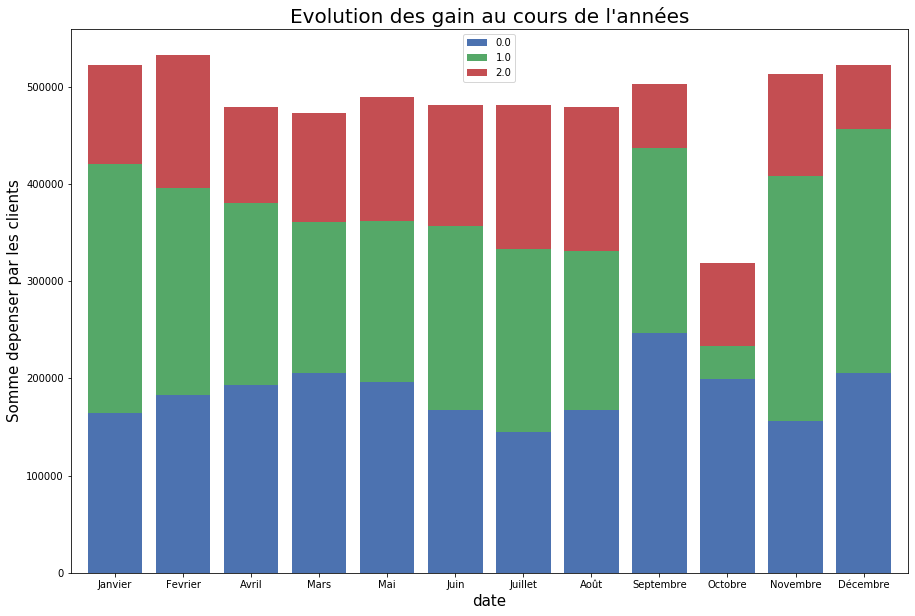

In [13]:
y = pd.pivot_table(data, values='price', index= [data.date.dt.month], columns='categ', aggfunc='sum')
y = y.reset_index()

y[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('date',fontsize=15)
plt.ylabel("Somme depenser par les clients",fontsize=15)
plt.title("Evolution des gain au cours de l'années",fontsize=20)
plt.grid(False)
plt.legend()

plt.show()

In [14]:
data[(data.date.dt.month == 10) & (data.categ == 1)].date.dt.day.sort_values().unique()

array([ 1, 28, 29, 30, 31])

On peut voire qu'il n'y a pas d'achats dans la categorie 1 durant le mois hors les jours n°1,28,29,30,31.

Cette disparition des jours d'achats sur cette categorie pourrait expliquer la perte de CA durant le mois d'octobre

### Le produit manquant

Nous avons egalement remarquer qu'un produits ne possaidait ni prix ni categorie mais qu'il etait tout de même utiliser lors de transactions.

In [15]:
data[data.price.isna()].head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972,50
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973,49
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975,47
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982,40
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988,34


In [16]:
len(data[data.price.isna()])

103

In [17]:
data[data.price.isna()].id_prod.unique()

array(['0_2245'], dtype=object)

On peut voire qu'il ni a qu'un seul produits dans ce cas la.

Pour remedier a la perte de données occasionner nous allons remplire ces données. Nous connaissons la categorie du produits grace a sont identifiant. Ici le produits commence par 0 donc il fait partie de cette categorie. Pour le prix nous utiliserons le prix moyen de la categorie (ils seront detailler un peut plus bas).

L'impacte sur le totals devrait etre assez moindre le prix moyen pour cette categorie est au allentour de 10€, mais il y a 103 entrer.

In [18]:
data[data.categ == 0].price.max()


40.99

In [19]:
data[data.categ == 0].price.min()


0.62

comme nous l'indique ces chiffres, les prix varies. De plus avec le nombres d'entrer concerner nous avons une variation du prix total allans de :

In [20]:
print (' au minimum {}€, et au maximum {}€'.format(data[data.categ == 0].price.min() * len(data[data.price.isna()]),data[data.categ == 0].price.max() * len(data[data.price.isna()])))


 au minimum 63.86€, et au maximum 4221.97€


Certe cette ajout peut paraitre enorme mais au vue des chiffres mensuelle detaillers plus loin il ne seront pas tres impactant. De plus les entrer ne sont pas regrouper que sur un seul mois.

In [21]:
data[data.price.isna()].date.dt.month.unique()

array([ 6, 11,  2,  3, 10,  8,  5, 12,  1,  9,  4,  7])

_Differents mois ou le produits non enregistrer ce trouve_

### Imputation des données

In [22]:
prixMoyenAvantModif = data[data.categ==0].price.mean()

data.loc[data.price.isna(),'price'] = prixMoyenAvantModif
data.loc[data.categ.isna(),'categ'] = 0

data[data.id_prod == '0_2245'].head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,10.646828,0.0,m,1972,50
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,10.646828,0.0,m,1973,49
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,10.646828,0.0,f,1975,47
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,10.646828,0.0,f,1982,40
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,10.646828,0.0,m,1988,34


Nous pouvons voires que les changement ont bien ete apporter

# Etude des clients

Dans cette section nous allons etudier la repartition de l'age et du sexe des clients issu du portefeuille clients mais egalement des transaction au cours de l'année.

### Le portefeuille client

Pour cette etude nous allons nous concentrer sur les clients du fichier _cus_

In [23]:
nb_client = cus.client_id.value_counts().sum()
nb_persoParSex = cus.sex.value_counts()
nb_persoParAnnee = cus['age'].value_counts()
age_moyen = cus['age'].mean()
age_median = cus['age'].median()
age_modal = cus['age'].mode()[0]
annee_min = cus['age'].min()
annee_max = cus['age'].max()
variance_age = cus['age'].var()
ecarttype_age = cus['age'].std()

In [24]:
print("age moyen :{} ans \n un ecart-type de {}, \n l'age median est de {} ans \n age modale a {} ans \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % age_moyen, 
              "%.2f" % ecarttype_age,
              int(age_median),
              age_modal,
              cus.age.min(),
              cus.age.max()))


age moyen :43.72 ans 
 un ecart-type de 16.92, 
 l'age median est de 43 ans 
 age modale a 18 ans 
 fourchette d'age de 18 ans a 93 ans


In [25]:
print("Nombre de femmes :{} \n Nombre d'homme : {} \nle tout pour un total de {} client differents "
      .format(nb_persoParSex['f'],nb_persoParSex['m'],nb_client))


Nombre de femmes :4490 
 Nombre d'homme : 4131 
le tout pour un total de 8621 client differents 


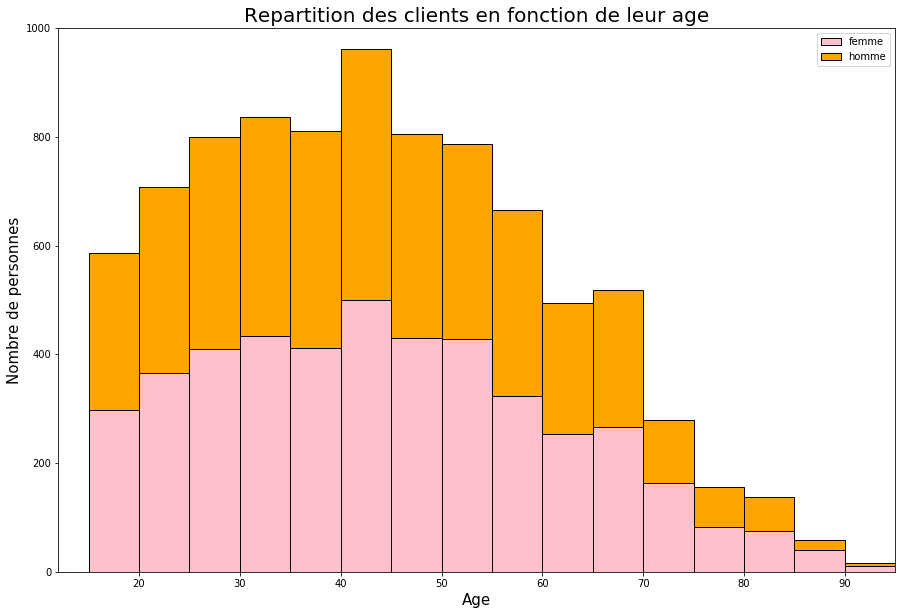

In [26]:

f = cus['age'][cus['sex']=='f']
m = cus['age'][cus['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'orange'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Age',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Repartition des clients en fonction de leur age',fontsize=20)
plt.axis([12, 95, 0, 1000])
plt.grid(False)
plt.legend()

plt.show()


### Les acheteurs 

Ici nous allons utiliser le fichier _data_ pour nous interresser au client qui on acheter quelquechose cette années

In [27]:
df_Acheteur = data.copy()
df_Acheteur = df_Acheteur.drop(columns=(['id_prod', 'date', 'session_id', 'price', 'categ']))
df_Acheteur.head()

,client_id,sex,birth,age
0,c_4450,f,1977,45
1,c_277,f,2000,22
2,c_4270,f,1979,43
3,c_4597,m,1963,59
4,c_1242,f,1980,42


In [28]:
nb_client_acheteur = df_Acheteur.client_id.value_counts().sum()
nb_persoParSex_acheteur = df_Acheteur.sex.value_counts()
nb_persoParAnnee_acheteur = df_Acheteur['age'].value_counts()
age_moyen_acheteur = df_Acheteur['age'].mean()
age_median_acheteur = df_Acheteur['age'].median()
age_modal_acheteur = df_Acheteur['age'].mode()[0]
annee_min_acheteur = df_Acheteur['age'].min()
annee_max_acheteur = df_Acheteur['age'].max()
variance_age_acheteur = df_Acheteur['age'].var()
ecarttype_age_acheteur = df_Acheteur['age'].std()


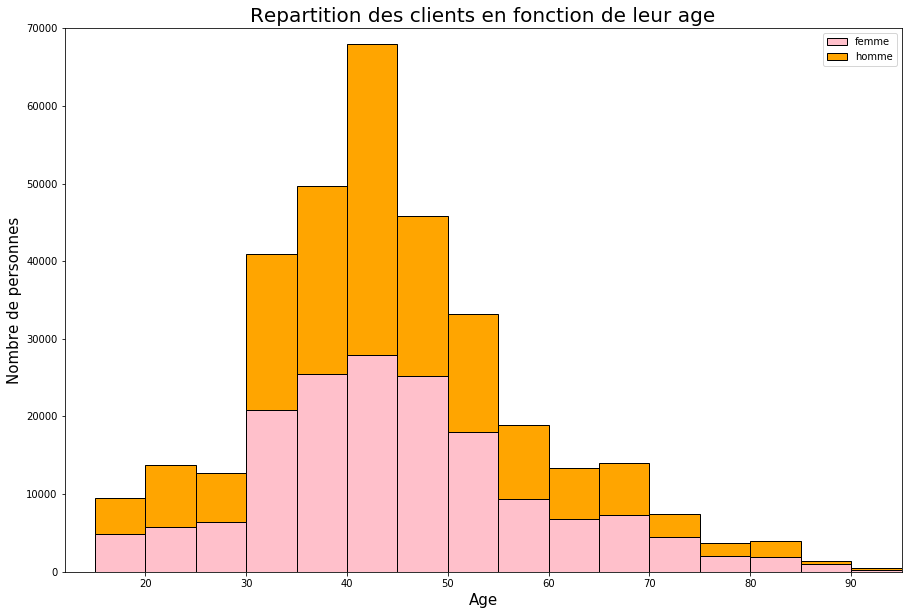

In [29]:


f = df_Acheteur['age'][df_Acheteur['sex']=='f']
m = df_Acheteur['age'][df_Acheteur['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'orange'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Age',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Repartition des clients en fonction de leur age',fontsize=20)
plt.axis([12, 95, 0, 70000])
plt.grid(False)
plt.legend()

plt.show()


In [30]:
print("age moyen :{} ans \n un ecart-type de {}, \n l'age median est de {} ans \n age modale a {} ans \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % age_moyen_acheteur, 
              "%.2f" % ecarttype_age_acheteur,
              int(age_median_acheteur),
              age_modal_acheteur,
              df_Acheteur.age.min(),
              df_Acheteur.age.max()))


age moyen :44.18 ans 
 un ecart-type de 13.52, 
 l'age median est de 42 ans 
 age modale a 42 ans 
 fourchette d'age de 18 ans a 93 ans


In [31]:
print("Nombre de femmes :{} \n Nombre d'homme : {} \nle tout pour un total de {} acheteurs "
      .format(nb_persoParSex_acheteur['f'],nb_persoParSex_acheteur['m'],nb_client_acheteur))


Nombre de femmes :167575 
 Nombre d'homme : 169241 
le tout pour un total de 336816 acheteurs 


ici ce que l'ont peut retenir ces que les clients du portefeuille client ne sont pas representatif des acheteur. Un exemple simple, nous avons une majoriter de femme dans le portefeuille et une majoriter d'homme chez les acheteurs. 

### Etude des depenses des clients 

Ici nous allons observer les depenses des nos clients acheteur durant l'années

In [32]:
depenseParClient = pd.pivot_table(data, values='price', index='client_id',aggfunc='sum')
depenseParClient = depenseParClient.reset_index()

client_depenseMoyenne = depenseParClient.price.mean()
client_depenseMedian = depenseParClient.price.median()
ecarttype_depenseClient = depenseParClient.price.std()
variance_depenseClient = depenseParClient.price.var()


In [33]:
print("Les clients on en moyenne dépenser {}€\n la dépense médiane a {}€\n le tout avec un écart-type de {}"
      .format("%.2f" % client_depenseMoyenne, "%.2f" % client_depenseMedian, "%.2f" % ecarttype_depenseClient))


Les clients on en moyenne dépenser 674.15€
 la dépense médiane a 501.31€
 le tout avec un écart-type de 2565.99


In [34]:
depenseParClient.sort_values(by='price',ascending=False).head(10)


,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73218.633656
2724,c_3454,54464.213656
7715,c_7959,2564.250000
7791,c_8026,2548.316828
3870,c_4491,2540.530000
1268,c_2140,2527.010000
8195,c_8392,2515.980000
7120,c_7421,2511.980000


 Voici ci dessus la liste des 10 clients les plus depensier. On peut clairement voire que nous avons de tres gros 
 contributeur, notament les 4 premieres personnes

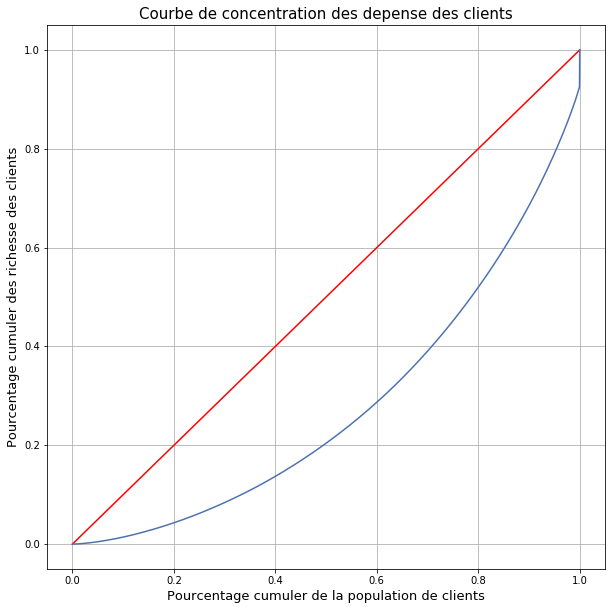

In [35]:
c = depenseParClient.copy()
c = c.sort_values(by='price')
c = c.reset_index()
c = c.drop(columns='index')


dep = c['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des depense des clients', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des clients', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population de clients', fontsize=13)
plt.grid(True)
plt.show()

In [36]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.4398980967377766

La forme etrange de la courbe a la fin indique bien que la repartition au seins des clients est inegale. On voit ici que moins de 1% des clients represente un peu moins de 10% du ca de l'entreprise.

In [37]:
depenseParClient.sort_values(by='price',ascending=False)[:5].price.sum() * 100 / depenseParClient.price.sum()

7.529081795569122


Nous avons ci dessus la preuvent par calcule que les 5 clients les plus depensier, qui ne represente que 0.001% du portefeuille clients apport 7% du CA a l'entreprise

### Depense en fonction de l'age

Ici nous allons voire les depense des clients en fonction de leur age.

In [38]:
achatParAge = pd.pivot_table(data, values='price',index='age', aggfunc='sum' )
achatParAge = achatParAge.reset_index()

tranche_age = 5
test = np.arange(15,100,tranche_age)
groupes_age=[]

for ind, nb in enumerate(test):
    a=0
    a = achatParAge[(achatParAge['age'] >= nb) & (achatParAge['age'] < nb+tranche_age)].sum()
    d={
        'age':'{}~{}'.format(nb, nb+tranche_age),
        'price':a[1].round(3)
    }
    groupes_age.append(d)
    
df_trancheAge = pd.DataFrame(groupes_age)

#On ajoute cette petite ligne pour enlever le derniere elements dont nous n'avons pas besoin
df_trancheAge = df_trancheAge[:-1]


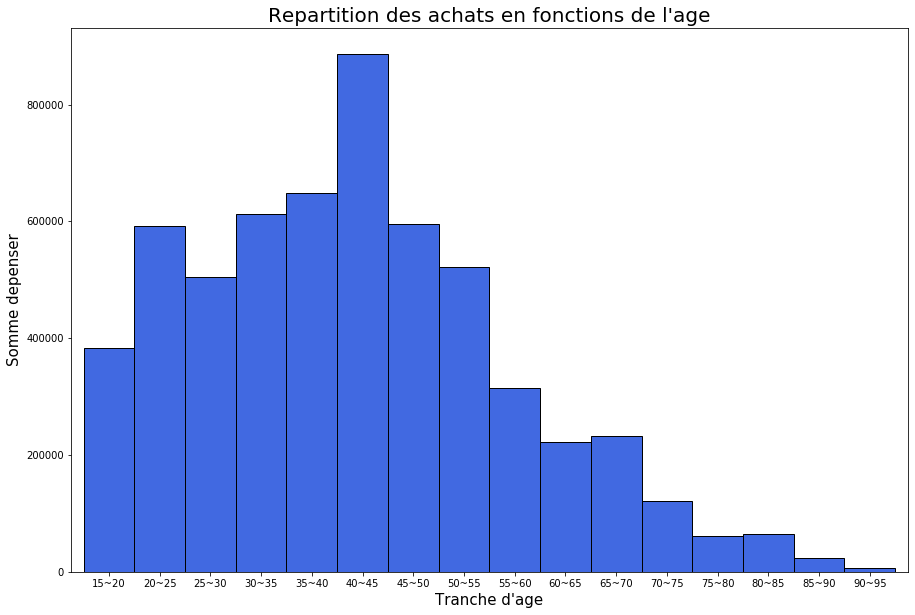

In [39]:

df_trancheAge.plot.bar('age','price',
                       figsize=(15,10),
                       rot =0,
                       width = 1,
                       edgecolor = 'black',
                       color='royalblue',
                      legend=None)

plt.xlabel("Tranche d'age",fontsize=15)
plt.ylabel("Somme depenser",fontsize=15)
plt.title("Repartition des achats en fonctions de l'age",fontsize=20)
plt.grid(False)
plt.show()


Nous avons si dessus la repartition des achats en fonctions de l'age de nos clients, il est notable de voire qu'une tranche d'age sort du lot

# Etude des produits 

Ici nous allons nous interresser a la repartions des prix des produits et nous etudirons les categories de ces derniers

### Le catalogue

ici nous etudirons le fichier _pro_ qui contient tout les article proposer sur le site.

In [40]:
nb_deProduit = pro.id_prod.value_counts().sum()
nb_deProduitParCateg = pro.categ.value_counts()
prix_moyen = pro.price.mean()
prix_modale = pro.price.mode()[0]
prix_median = pro.price.median()
prix_min = pro.price.min()
prix_max =pro.price.max()
ecarttype_prix = pro.price.std()
variance_prix = pro.price.var()


In [41]:
print('Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max,prix_min,"%.2f" % prix_moyen, "%.2f" % ecarttype_prix, prix_median,prix_modale,nb_deProduit))

Le prix maximum est a 300.0 €
 le minimum est a 0.62€ 
 le prix moyen est a 21.86€ 
 avec un ecat-type de 29.85 
 le prix median est a 13.075€ 
 le modale a 4.99€, 
 il y a 3286 produits differents


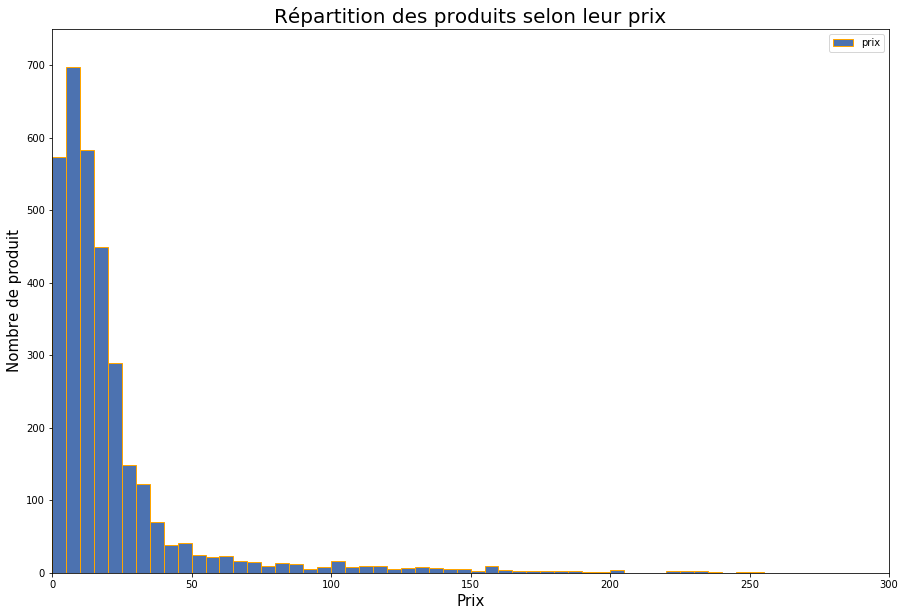

In [42]:
pro['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produit',fontsize=15)
plt.title('Répartition des produits selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 750])
plt.grid(False)
plt.legend()
plt.show()


Petite courbe de concentration pour bien marquer la repartition des produits

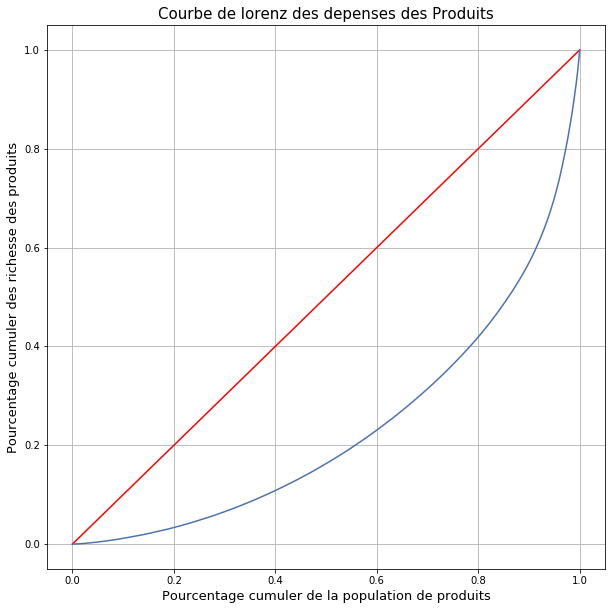

In [43]:
d = pro.copy()
d = d.sort_values(by='price')
d = d.reset_index()
d = d.drop(columns=['categ','index'])


dep = d['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de lorenz des depenses des Produits', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des produits', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population de produits', fontsize=13)
plt.grid(True)
plt.show()

In [44]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.5321753235061014

### Les categories

Penchons nous un peut plus sur les categories

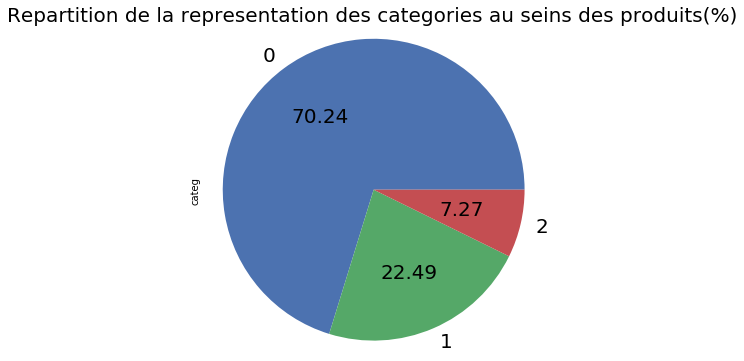

In [45]:
nb_deProduitParCateg.plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Repartition de la representation des categories au seins des produits(%)', fontsize=20)
plt.axis('equal')
plt.show()


Pour poursuivre sur les categorie, voici le prix moyen de chaque categories, prix que nous avons utiliser deja precedement.

In [46]:
prixMoyenCateg = pd.pivot_table(data, index='categ', values='price', aggfunc='mean')
prixMoyenCateg.round(3)

,price
categ,
0.0,10.647
1.0,20.480
2.0,75.175


la categorie 0 a un prix moyen de 10 euro la categorie 1 de 20 et la 2 de 75 euro (arondit a l'euro pres)

### Repartition par categories

Nous allons etudier la repartition des achats par categories au cours de l'année

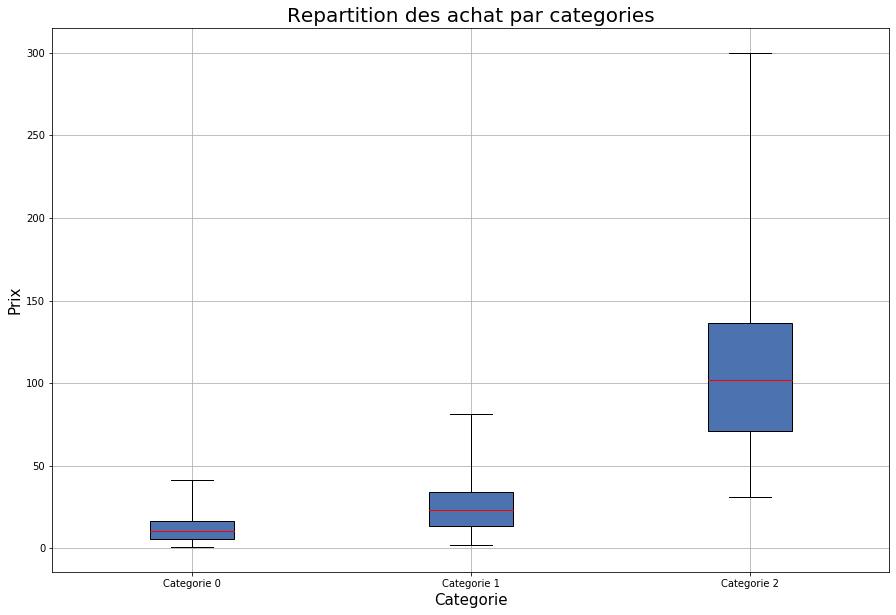

In [47]:
# ------------------------------------------------------------------------------------------

repParCateg_catalogue = pro.copy()

#creation de sous liste
prixCateg0 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 0 ]['price']
prixCateg1 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 1 ]['price']
prixCateg2 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categorie', fontsize=15)
plt.title('Repartition des achat par categories', fontsize=20)
plt.grid(True)
plt.show()

ici nous pouvons voire la repartition des prix de chaque categories

Passons ici les details des calcules habituel

In [48]:
#Categ0
nb_deProduit_categ0_catalogue = pro[pro.categ==0].id_prod.value_counts().sum()
nb_deProduitParCateg_categ0_catalogue = pro[pro.categ==0].categ.value_counts()
prix_moyen_categ0_catalogue = pro[pro.categ==0].price.mean()
prix_modale_categ0_catalogue = pro[pro.categ==0].price.mode()[0]
prix_median_categ0_catalogue = pro[pro.categ==0].price.median()
prix_min_categ0_catalogue = pro[pro.categ==0].price.min()
prix_max_categ0_catalogue = pro[pro.categ==0].price.max()
ecarttype_prix_categ0_catalogue = pro[pro.categ==0].price.std()
variance_prix_categ0_catalogue = pro[pro.categ==0].price.var()


#Categ1
nb_deProduit_categ1_catalogue = pro[pro.categ == 1].id_prod.value_counts().sum()
nb_deProduitParCateg_categ1_catalogue = pro[pro.categ == 1].categ.value_counts()
prix_moyen_categ1_catalogue = pro[pro.categ == 1].price.mean()
prix_modale_categ1_catalogue = pro[pro.categ == 1].price.mode()[0]
prix_median_categ1_catalogue = pro[pro.categ == 1].price.median()
prix_min_categ1_catalogue = pro[pro.categ == 1].price.min()
prix_max_categ1_catalogue = pro[pro.categ == 1].price.max()
ecarttype_prix_categ1_catalogue = pro[pro.categ == 1].price.std()
variance_prix_categ1_catalogue = pro[pro.categ == 1].price.var()


#Categ2
nb_deProduit_categ2_catalogue = pro[pro.categ == 2].id_prod.value_counts().sum()
nb_deProduitParCateg_categ2_catalogue = pro[pro.categ == 2].categ.value_counts()
prix_moyen_categ2_catalogue = pro[pro.categ == 2].price.mean()
prix_modale_categ2_catalogue = pro[pro.categ == 2].price.mode()[0]
prix_median_categ2_catalogue = pro[pro.categ == 2].price.median()
prix_min_categ2_catalogue = pro[pro.categ == 2].price.min()
prix_max_categ2_catalogue = pro[pro.categ == 2].price.max()
ecarttype_prix_categ2_catalogue = pro[pro.categ == 2].price.std()
variance_prix_categ2_catalogue = pro[pro.categ == 2].price.var()


In [49]:
print('Pour la categorie 0 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ0_catalogue,
              prix_min_categ0_catalogue,
              "%.2f" % prix_moyen_categ0_catalogue,
              "%.2f" % ecarttype_prix_categ0_catalogue,
              prix_median_categ0_catalogue,
              prix_modale_categ0_catalogue,
              nb_deProduit_categ0_catalogue
             ))


Pour la categorie 0 
 Le prix maximum est a 40.99 €
 le minimum est a 0.62€ 
 le prix moyen est a 11.73€ 
 avec un ecat-type de 7.57 
 le prix median est a 10.32€ 
 le modale a 4.99€, 
 il y a 2308 produits differents


In [50]:
print('Pour la categorie 1 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ1_catalogue,
              prix_min_categ1_catalogue,
              "%.2f" % prix_moyen_categ1_catalogue, 
              "%.2f" % ecarttype_prix_categ1_catalogue, 
              prix_median_categ1_catalogue,
              prix_modale_categ1_catalogue,
              nb_deProduit_categ1_catalogue))


Pour la categorie 1 
 Le prix maximum est a 80.99 €
 le minimum est a 2.0€ 
 le prix moyen est a 25.53€ 
 avec un ecat-type de 15.43 
 le prix median est a 22.99€ 
 le modale a 22.99€, 
 il y a 739 produits differents


In [51]:
print('Pour la categorie 2\n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ2_catalogue,
              prix_min_categ2_catalogue,
              "%.2f" % prix_moyen_categ2_catalogue,
              "%.2f" % ecarttype_prix_categ2_catalogue,
              prix_median_categ2_catalogue,
              prix_modale_categ2_catalogue,
              nb_deProduit_categ2_catalogue))

Pour la categorie 2
 Le prix maximum est a 300.0 €
 le minimum est a 30.99€ 
 le prix moyen est a 108.35€ 
 avec un ecat-type de 49.56 
 le prix median est a 101.99€ 
 le modale a 50.99€, 
 il y a 239 produits differents


### Etude des produits acheter 

Ici nous allons nous interresser au produits acheter, a savoir leur repartition en fonction de leur prix ou encore la categorie la plus acheter.

In [52]:
df_ProduitVendu = data.copy()
df_ProduitVendu = df_ProduitVendu.drop(columns=(['date', 'session_id', 'client_id', 'sex', 'birth', 'age']))
df_ProduitVendu.head()


,id_prod,price,categ
0,0_1483,4.99,0.0
1,2_226,65.75,2.0
2,1_374,10.71,1.0
3,0_2186,4.20,0.0
4,0_1351,8.99,0.0


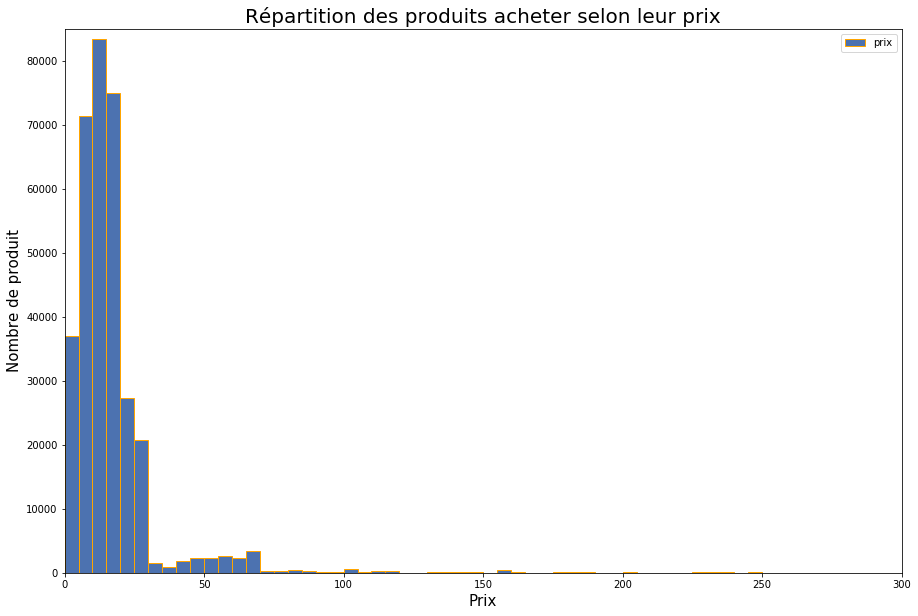

In [53]:
df_ProduitVendu['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produit',fontsize=15)
plt.title('Répartition des produits acheter selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 85000])
plt.grid(False)
plt.legend()
plt.show()

In [54]:
nb_deProduit_acheter = df_ProduitVendu.id_prod.value_counts().sum()
nb_deProduitParCateg_acheter = df_ProduitVendu.categ.value_counts()
prix_moyen_acheter = df_ProduitVendu.price.mean()
prix_modale_acheter = df_ProduitVendu.price.mode()[0]
prix_median_acheter = df_ProduitVendu.price.median()
prix_min_acheter = df_ProduitVendu.price.min()
prix_max_acheter =df_ProduitVendu.price.max()
ecarttype_prix_acheter = df_ProduitVendu.price.std()
variance_prix_acheter = df_ProduitVendu.price.var()


In [55]:
print('Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits acheter cette année'
      .format(prix_max_acheter,prix_min_acheter,"%.2f" % prix_moyen_acheter, "%.2f" % ecarttype_prix_acheter, prix_median_acheter,prix_modale_acheter,nb_deProduit_acheter))

Le prix maximum est a 300.0 €
 le minimum est a 0.62€ 
 le prix moyen est a 17.21€ 
 avec un ecat-type de 17.85 
 le prix median est a 13.9€ 
 le modale a 15.99€, 
 il y a 336816 produits acheter cette année


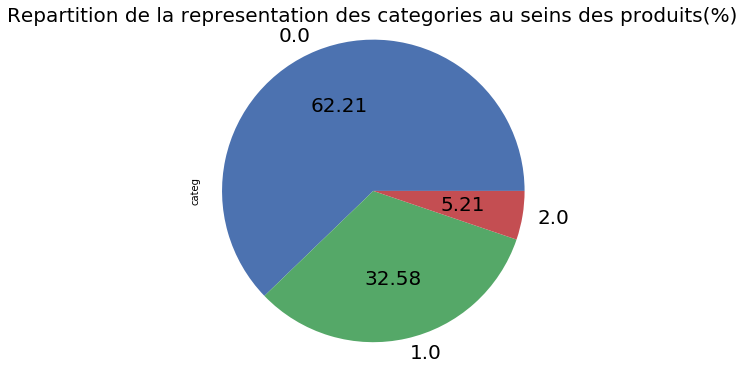

In [56]:
nb_deProduitParCateg_acheter.plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Repartition de la representation des categories au seins des produits(%)', fontsize=20)
plt.axis('equal')
plt.show()

In [57]:
df_NbAchatParProduits = pd.pivot_table(data, values='client_id', index='id_prod', aggfunc='count')
df_NbAchatParProduits.sort_values(by='client_id', ascending=False).head(10)

,client_id
id_prod,
1_369,1081
1_417,1062
1_498,1036
1_414,1027
1_425,1013
1_398,952
1_406,946
1_413,944
1_403,939


Voici la liste des 10 produits qui ce sont le mieux vendu

In [58]:
transaction_parProduit = df_ProduitVendu.id_prod.value_counts()
len(transaction_parProduit[transaction_parProduit <= 12]) * 100 / nb_deProduit

33.68837492391966

Ici nous pouvons voire que 33% du catalogue est vendu 12 fois ou moins dans l'année

### Repartition par categories

Nous allons etudier la repartition des achats par categories au cours de l'année

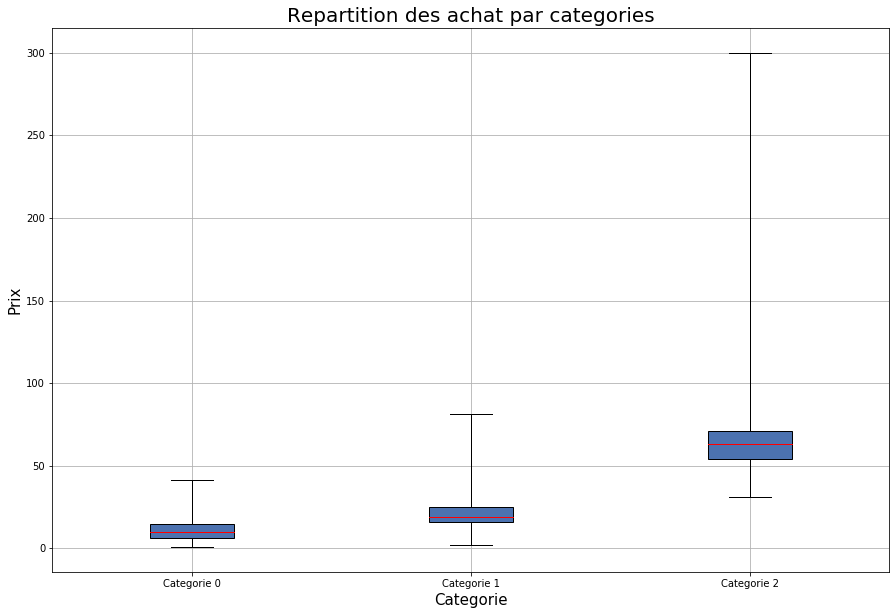

In [59]:
repParCateg = data.copy()
repParCateg = repParCateg.drop(columns=['date','id_prod','session_id','client_id', 'birth', 'age', 'sex'])

#creation de sous liste
prixCateg0 = repParCateg[repParCateg['categ'] == 0 ]['price']
prixCateg1 = repParCateg[repParCateg['categ'] == 1 ]['price']
prixCateg2 = repParCateg[repParCateg['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categorie', fontsize=15)
plt.title('Repartition des achat par categories', fontsize=20)
plt.grid(True)
plt.show()

ici nous pouvons voire la repartition des prix de chaque categories

Passons ici les details des calcules habituel

In [60]:
#Categ0
nb_deProduit_categ0 = data[data.categ==0].id_prod.value_counts().sum()
nb_deProduitParCateg_categ0 = data[data.categ==0].categ.value_counts()
prix_moyen_categ0 = data[data.categ==0].price.mean()
prix_modale_categ0 = data[data.categ==0].price.mode()[0]
prix_median_categ0 = data[data.categ==0].price.median()
prix_min_categ0 = data[data.categ==0].price.min()
prix_max_categ0 = data[data.categ==0].price.max()
ecarttype_prix_categ0 = data[data.categ==0].price.std()
variance_prix_categ0 = data[data.categ==0].price.var()


#Categ1
nb_deProduit_categ1 = data[data.categ == 1].id_prod.value_counts().sum()
nb_deProduitParCateg_categ1 = data[data.categ == 1].categ.value_counts()
prix_moyen_categ1 = data[data.categ == 1].price.mean()
prix_modale_categ1 = data[data.categ == 1].price.mode()[0]
prix_median_categ1 = data[data.categ == 1].price.median()
prix_min_categ1 = data[data.categ == 1].price.min()
prix_max_categ1 = data[data.categ == 1].price.max()
ecarttype_prix_categ1 = data[data.categ == 1].price.std()
variance_prix_categ1 = data[data.categ == 1].price.var()


#Categ2
nb_deProduit_categ2 = data[data.categ == 2].id_prod.value_counts().sum()
nb_deProduitParCateg_categ2 = data[data.categ == 2].categ.value_counts()
prix_moyen_categ2 = data[data.categ == 2].price.mean()
prix_modale_categ2 = data[data.categ == 2].price.mode()[0]
prix_median_categ2 = data[data.categ == 2].price.median()
prix_min_categ2 = data[data.categ == 2].price.min()
prix_max_categ2 = data[data.categ == 2].price.max()
ecarttype_prix_categ2 = data[data.categ == 2].price.std()
variance_prix_categ2 = data[data.categ == 2].price.var()

In [61]:
print('Pour la categorie 0 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ0,prix_min_categ0,"%.2f" % prix_moyen_categ0, "%.2f" % ecarttype_prix_categ0, prix_median_categ0,prix_modale_categ0,nb_deProduit_categ0))


Pour la categorie 0 
 Le prix maximum est a 40.99 €
 le minimum est a 0.62€ 
 le prix moyen est a 10.65€ 
 avec un ecat-type de 4.93 
 le prix median est a 9.99€ 
 le modale a 4.99€, 
 il y a 209529 produits vendu


In [62]:
print('Pour la categorie 1 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ1,prix_min_categ1,"%.2f" % prix_moyen_categ1, "%.2f" % ecarttype_prix_categ1, prix_median_categ1,prix_modale_categ1,nb_deProduit_categ1))


Pour la categorie 1 
 Le prix maximum est a 80.99 €
 le minimum est a 2.0€ 
 le prix moyen est a 20.48€ 
 avec un ecat-type de 7.57 
 le prix median est a 19.08€ 
 le modale a 15.99€, 
 il y a 109735 produits vendu


In [63]:
print('Pour la categorie 2\n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ2,prix_min_categ2,"%.2f" % prix_moyen_categ2, "%.2f" % ecarttype_prix_categ2, prix_median_categ2,prix_modale_categ2,nb_deProduit_categ2))

Pour la categorie 2
 Le prix maximum est a 300.0 €
 le minimum est a 30.99€ 
 le prix moyen est a 75.17€ 
 avec un ecat-type de 39.08 
 le prix median est a 62.83€ 
 le modale a 68.99€, 
 il y a 17552 produits vendu


### repartition des achats de chaque categorie par tranche d'age 

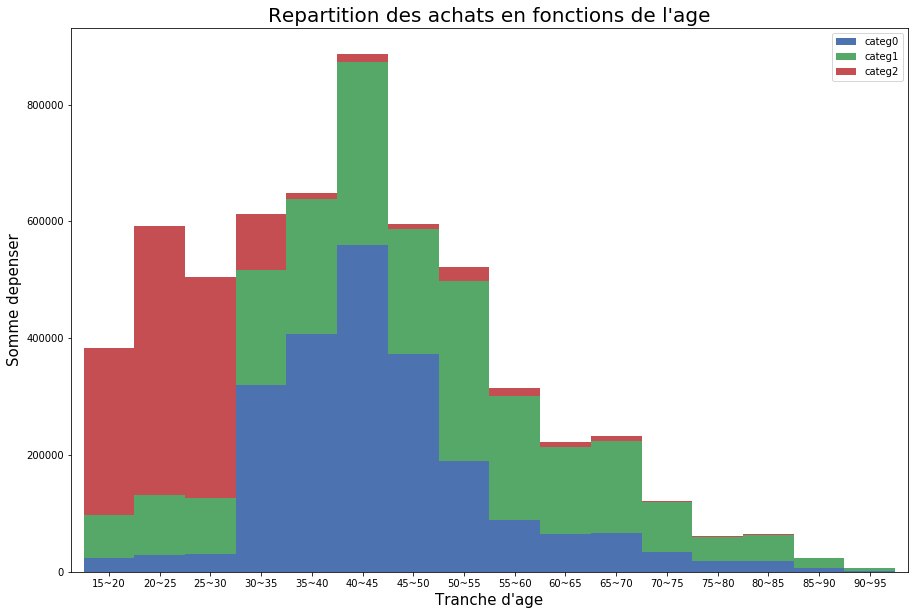

In [64]:
repAchatAgeCateg = pd.pivot_table(data, values='price',index='age', columns='categ', aggfunc='sum' )
repAchatAgeCateg = repAchatAgeCateg.reset_index()
repAchatAgeCateg.head()   
taille_classe = 5.0 
groupes = []



tranches = np.arange(15,100,tranche_age)

for ind, tr in enumerate(tranches):
        a = 0
        a = repAchatAgeCateg[(repAchatAgeCateg['age'] >= tr) & (repAchatAgeCateg['age'] < tr+taille_classe)].sum()
        g={'age':'{}~{}'.format(tr, tr+tranche_age),
           'categ0':a[0],
           'categ1':a[1],
           'categ2':a[2]}
        groupes.append(g)

groupes = pd.DataFrame(groupes)
groupes = groupes.round(3)
#On ajoute cette petite ligne pour enlever le derniere elements dont nous n'avons pas besoin
groupes = groupes[:-1]


groupes[['categ0','categ1','categ2']].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=1)

plt.xticks(np.arange(0, 16, 1),(groupes.age))
plt.xlabel("Tranche d'age",fontsize=15)
plt.ylabel("Somme depenser",fontsize=15)
plt.title("Repartition des achats en fonctions de l'age",fontsize=20)
plt.grid(False)
plt.legend()

plt.show()


### Evolution du ca par categories 

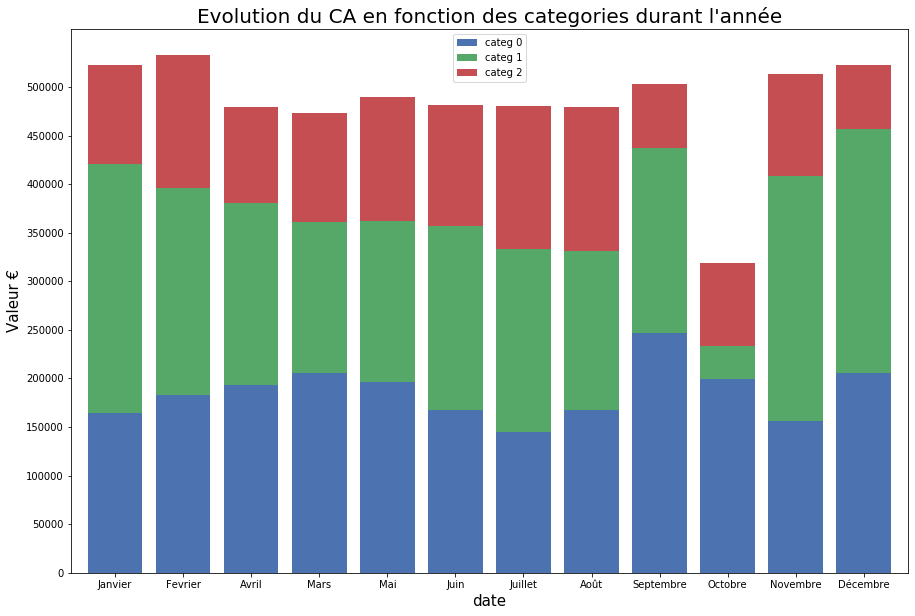

In [65]:
evoCACateg = pd.pivot_table(data, values='price', index= data.date.dt.month, columns='categ', aggfunc='sum')
evoCACateg = evoCACateg.reset_index()

evoCACateg[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=0.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.yticks(np.arange(0, 550000, 50000))
plt.xlabel('date',fontsize=15)
plt.ylabel("Valeur €",fontsize=15)
plt.title("Evolution du CA en fonction des categories durant l'année",fontsize=20)
plt.grid(False)
plt.legend(['categ 0','categ 1','categ 2'])
plt.show()

# Etude des paniers

Dans cette partie nous nous concentreront sur les paniers des client, nous observeront egalement leur evolutions tout au long de cette année, et ainsi nous pourrons sortir les periodes les plus populaire au pres des clients


In [66]:
toutPanierAnnee = pd.pivot_table(data, values='price', index='session_id', aggfunc='sum')

panierMoyen = toutPanierAnnee.mean()
panierModale = toutPanierAnnee.mode()
panierMedian = toutPanierAnnee.median()
ecarttype_panier = toutPanierAnnee.std()[0]
variance_panier = toutPanierAnnee.var()
nb_dePanier = toutPanierAnnee.size
gainPanier = toutPanierAnnee.sum()[0]

# 1 session = 1 panier
toutPanierAnnee.head()


,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [67]:
print("Panier moyen = {}€, \n panier median = {}€, \n panier modale = {}€, \n ecart-type : {}, \n Il y a eu un chiffre d'affaire de {}€ pour un total de {} paniers"
      .format("%.2f" % panierMoyen,"%.2f" %  panierMedian[0], panierModale.values[0], "%.2f" % ecarttype_panier,"%.2f" % gainPanier, nb_dePanier))


Panier moyen = 34.27€, 
 panier median = 25.57€, 
 panier modale = [15.99]€, 
 ecart-type : 31.87, 
 Il y a eu un chiffre d'affaire de 5797674.39€ pour un total de 169194 paniers


In [68]:
toutPanierAnneeParClient = pd.pivot_table(data, values='session_id', index='client_id', aggfunc='count')

NbPanierMoyenParClient = toutPanierAnneeParClient.mean()
NbPanierModalParClient = toutPanierAnneeParClient.mode()
NbPanierMedianParClient = toutPanierAnneeParClient.median()
ecarttype_NbPanierParClient = toutPanierAnneeParClient.std()
variance_NbPanierParClient = toutPanierAnneeParClient.var()

toutPanierAnneeParClient.head()

,session_id
client_id,
c_1,20
c_10,28
c_100,6
c_1000,56
c_1001,58


In [69]:
print("Nombre moyen de panier par client: {},\n Nombre median de panier par client: {},\n Nombre modale de panier par client: {},\n ecart-type: {},  variance: {},\n min: {}, max: {}"
      .format("%.2f" % NbPanierMoyenParClient,
              "%.2f" %  NbPanierMedianParClient,
              NbPanierModalParClient.values[0],
              "%.2f" % ecarttype_NbPanierParClient,
              "%.2f" % variance_NbPanierParClient,
              toutPanierAnneeParClient.min()[0],
              toutPanierAnneeParClient.max()[0]
             ))


Nombre moyen de panier par client: 39.16,
 Nombre median de panier par client: 25.00,
 Nombre modale de panier par client: [13],
 ecart-type: 156.45,  variance: 24476.07,
 min: 1, max: 12855


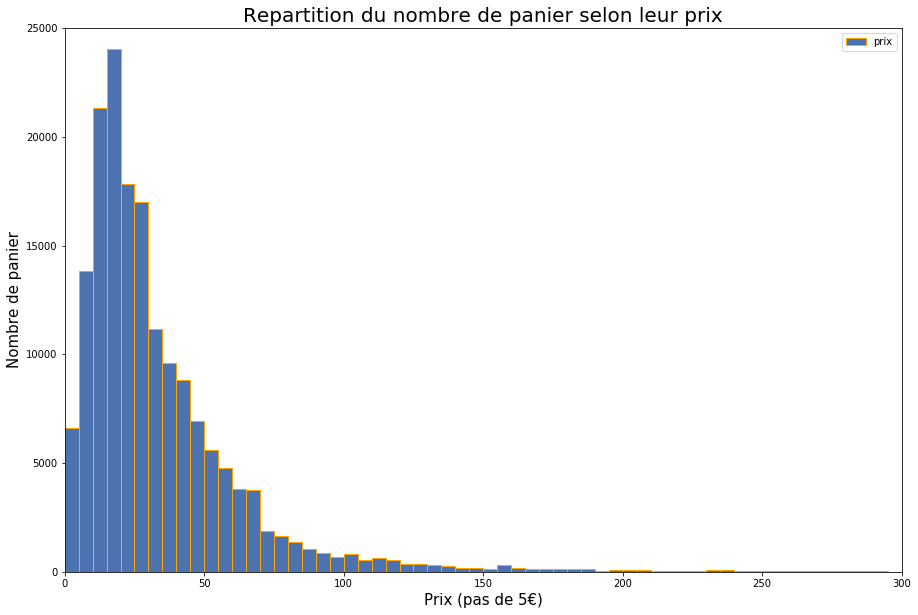

In [70]:
toutPanierAnnee['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix (pas de 5€)',fontsize=15)
plt.ylabel('Nombre de panier',fontsize=15)
plt.title('Repartition du nombre de panier selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 25000])
plt.grid(False)
plt.legend()
plt.show()


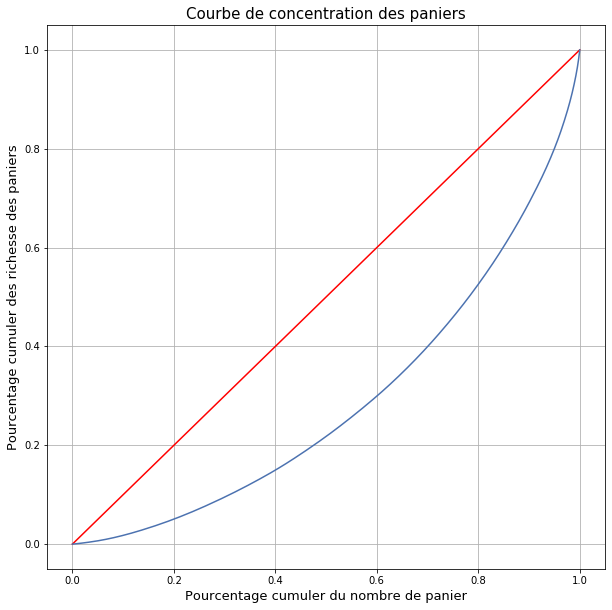

In [71]:
e = toutPanierAnnee.copy()
e = e.sort_values(by='price')
e = e.reset_index()

dep = e['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des paniers', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des paniers', fontsize=13)
plt.xlabel('Pourcentage cumuler du nombre de panier', fontsize=13)
plt.grid(True)
plt.show()

In [72]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.42046210685900987

Encore une fois notre courbe de concentration concorde avec nos observation sur la repartition des paniers. Ces derniers sont beaucoup de paniers "pas chere" et quelque un sont "tres chere" ce qui destabilise la balance.

# Correlation

Dans cette partie nous regarderons s'il existe une correlation, un lien, entre les données

## Correlation: Sexes Catégories


In [73]:
corrSexCateg = data[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len)
c = corrSexCateg.copy()

tx = data['sex'].value_counts()
ty = data['categ'].value_counts()

c.loc[:,'Total'] = tx
c.loc['total',:] = ty
c.loc['total','Total'] = len(data)

c

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846.0,55469.0,8260.0,167575.0
m,105683.0,54266.0,9292.0,169241.0
total,209529.0,109735.0,17552.0,336816.0


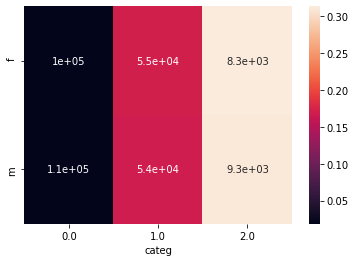

In [74]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data)
indep = tx.dot(ty.T) / n

mesure = (corrSexCateg-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=corrSexCateg)
sns.set(rc={'figure.figsize':(13,10)})
plt.show()

## Correlation: Ages et montant total d'achat

In [75]:
tdf_CAgeAchatTotal = pd.pivot_table(data,values='price', index=['client_id','age'], aggfunc='sum')
tdf_CAgeAchatTotal = tdf_CAgeAchatTotal.reset_index()

tdf_CAgeAchatTotal_mean = pd.pivot_table(tdf_CAgeAchatTotal, index=['age'], values="price",aggfunc='mean')
tdf_CAgeAchatTotal_mean = tdf_CAgeAchatTotal_mean.reset_index()
tdf_CAgeAchatTotal_mean.head()

,age,price
0,18,675.945034
1,19,610.078552
2,20,620.142530
3,21,679.051840
4,22,589.048286


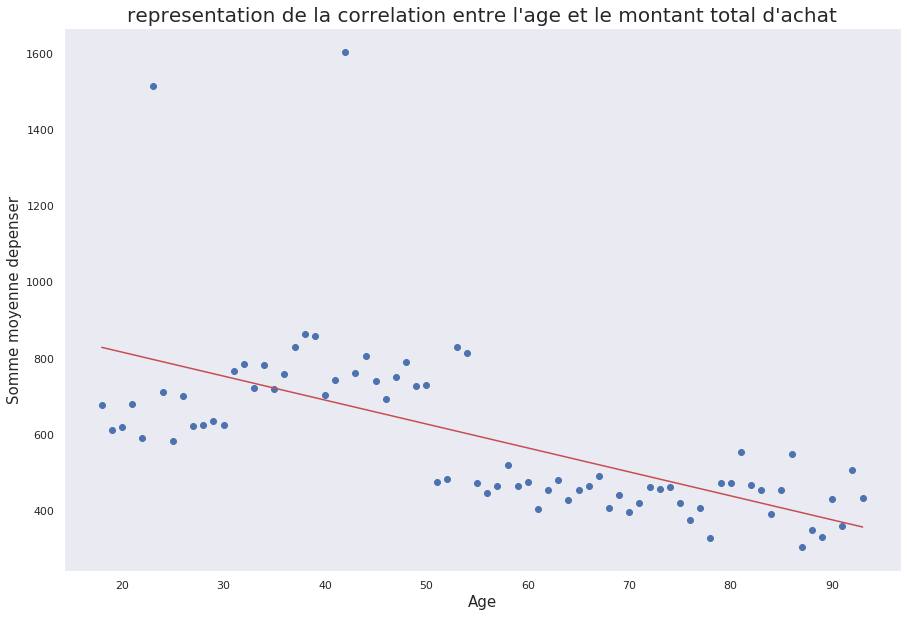

In [76]:

X = tdf_CAgeAchatTotal_mean['age']
Y = tdf_CAgeAchatTotal_mean['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Somme moyenne depenser",fontsize=15)
plt.title("representation de la correlation entre l'age et le montant total d'achat",fontsize=20)
plt.grid(False)
plt.show()


In [77]:
st.pearsonr(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'])[0]

-0.6255483384509141

In [78]:
np.cov(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'],ddof=0)[1,0]

-3027.1534911393555

On peut donc grace a la droite de regression et au coef de pearson voire qu'il y a un correlation entre l'age et le montant total des achats

## Correlation: Age et fréquence d'achat

In [79]:
tdf_1 = pd.pivot_table(data,values="session_id", index=['age',data.date.dt.month], aggfunc='count')

tdf_1 = tdf_1.reset_index()

#Nombre moyen d'article par client
tdf_2 = pd.pivot_table(tdf_1, index=['age'], values="session_id",aggfunc='mean')
tdf_2 = tdf_2.reset_index()

In [80]:
corTailleClasse = 5
corGroupes = []



corTrancheAge = np.arange(15,100,corTailleClasse)

for ind, tr in enumerate(corTrancheAge):
        a = 0
        a = tdf_2[(tdf_2['age'] >= tr) & (tdf_2['age'] < tr+corTailleClasse)]['session_id'].sum()
        g={
            'age':tr,
            'Nombre achat moyen par mois':a}
        corGroupes.append(g)

corGroupes = pd.DataFrame(corGroupes)
corGroupes = corGroupes[:-1]

corGroupes = corGroupes[['age', 'Nombre achat moyen par mois']]


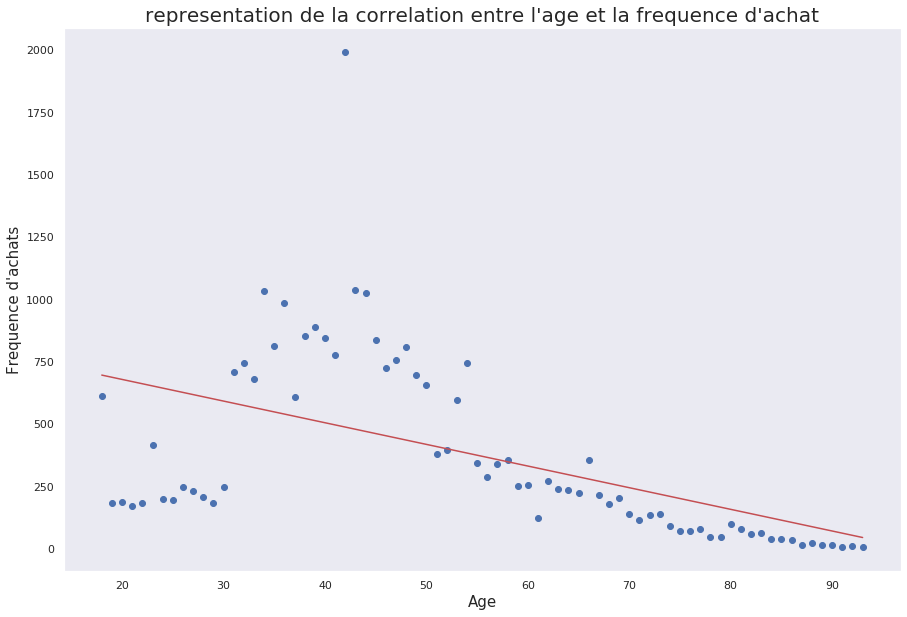

In [81]:
# X= corGroupes['age']
# Y= corGroupes['Nombre achat moyen par mois']

X = tdf_2['age']
Y = tdf_2['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Frequence d'achats",fontsize=15)
plt.title("representation de la correlation entre l'age et la frequence d'achat",fontsize=20)
plt.grid(False)
plt.show()


In [82]:
st.pearsonr(corGroupes['age'], corGroupes['Nombre achat moyen par mois'])[0]

-0.4863936774555399

In [83]:
np.cov(corGroupes['age'], corGroupes['Nombre achat moyen par mois'],ddof=0)[1,0]

-18294.010416666664

On peut voire qu'il y a une correlation entre l'age des client et leur frequence d'achat

## Correlation: Age et nombre de produits moyen acheté


In [84]:
#regroupe le nb d'article par session
tdf_CAgePanierMoy = pd.pivot_table(data, values='id_prod',index=['client_id','age','session_id'], aggfunc='count')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()

#Nombre moyen d'article par client
tdf_CAgePanierMoy = pd.pivot_table(tdf_CAgePanierMoy,index=['age'],values="id_prod",aggfunc='mean')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()
tdf_CAgePanierMoy.columns = ['age','nb_prod']
tdf_CAgePanierMoy.head()

,age,nb_prod
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220


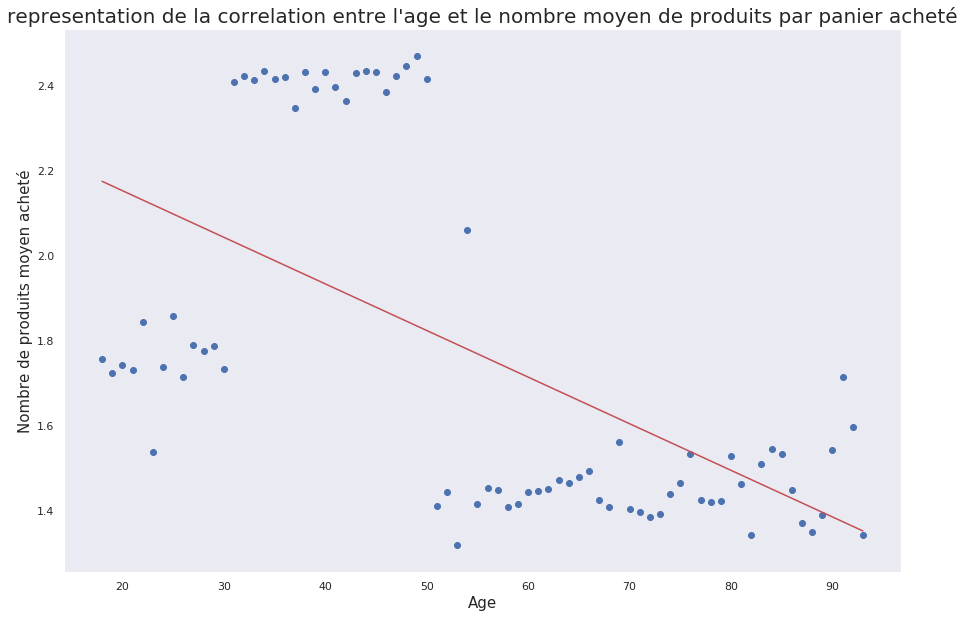

In [85]:

X = tdf_CAgePanierMoy['age']
Y = tdf_CAgePanierMoy['nb_prod']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Nombre de produits moyen acheté",fontsize=15)
plt.title("representation de la correlation entre l'age et le nombre moyen de produits par panier acheté",fontsize=20)
plt.grid(False)
plt.show()


In [86]:
st.pearsonr(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'])[0]

-0.5808288928810568

In [87]:
np.cov(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'],ddof=0)[1,0]

-5.271530370552438

Encore une fois en prenant le coef et la representation graph on peut voire qu'il y a une correlation entre les deux variable

## Correlation: Age et categories acheté

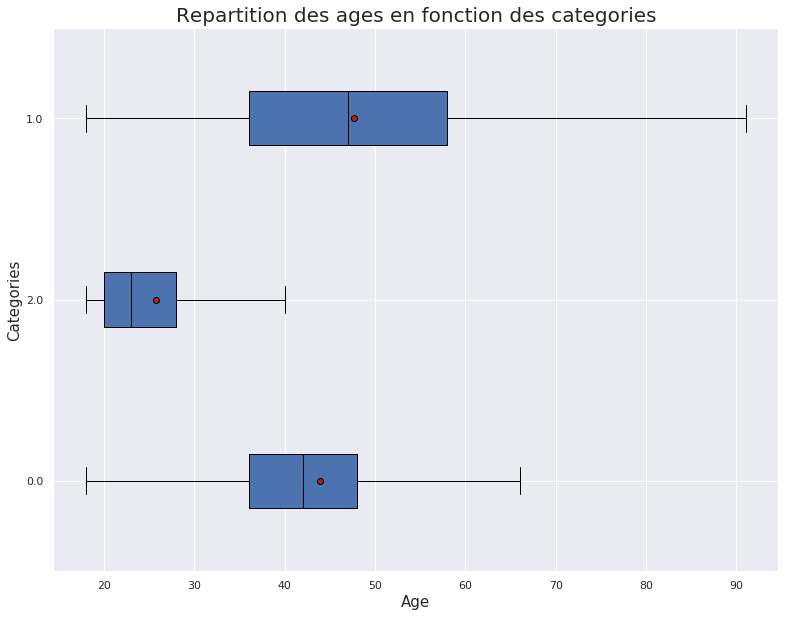

In [88]:
X = 'categ'
Y = 'age'

sous_echantillon = data[['age','categ']]


modalites = sous_echantillon[X].unique()
groupesCorr = []
for m in modalites:
    groupesCorr.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupesCorr, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Repartition des ages en fonction des categories', fontsize=20)
plt.ylabel('Categories', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

In [89]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = data[['age','categ']]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11884029228184805

Ici notre eta², nous donne un chiffre plutot faible et au vue de ce dernier et des graph il semblerai qu'il existe une faible correlation entre l'age et la categorie acheter par les clients
